## Suchanun's code

In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from matplotlib.pyplot import subplots
from sklearn. naive_bayes import GaussianNB
from sklearn. linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as skm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
heart = pd.read_csv('/Users/cream/Downloads/heart.csv') ## Please update the path to access the data
heart = heart.dropna()
heart = pd.get_dummies(heart, drop_first=True)

In [4]:
X = heart.drop('HeartDisease', axis=1) 
y = heart['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 141)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

### Decision Tree

[Text(0.5, 0.875, 'ST_Slope_Up <= 0.5\nentropy = 0.991\nsamples = 734\nvalue = [327, 407]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'MaxHR <= 136.5\nentropy = 0.685\nsamples = 422\nvalue = [77, 345]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'Sex_M <= 0.5\nentropy = 0.468\nsamples = 271\nvalue = [27, 244]\nclass = Heart Disease'),
 Text(0.0625, 0.125, 'entropy = 0.967\nsamples = 28\nvalue = [11, 17]\nclass = Heart Disease'),
 Text(0.1875, 0.125, 'entropy = 0.35\nsamples = 243\nvalue = [16, 227]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'ChestPainType_NAP <= 0.5\nentropy = 0.916\nsamples = 151\nvalue = [50.0, 101.0]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'entropy = 0.804\nsamples = 114\nvalue = [28, 86]\nclass = Heart Disease'),
 Text(0.4375, 0.125, 'entropy = 0.974\nsamples = 37\nvalue = [22, 15]\nclass = No Heart Disease'),
 Text(0.75, 0.625, 'Cholesterol <= 42.5\nentropy = 0.719\nsamples = 312\nvalue = [250.0, 62.0]\nclass = No Heart Disease'),
 Text(0.625, 0.375, '

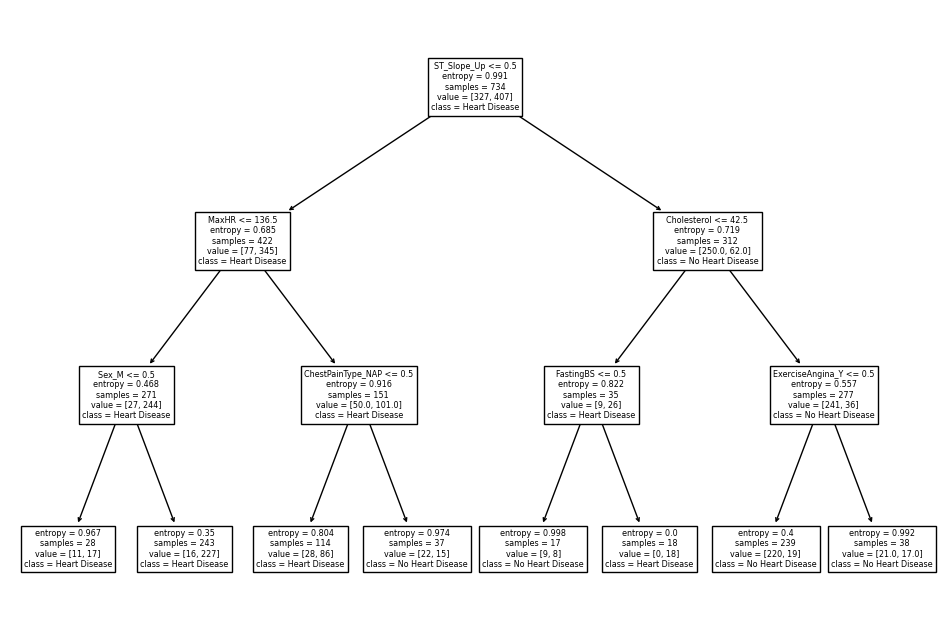

In [6]:
# classification tree
tree = DTC(criterion = 'entropy',
         max_depth = 3,
         random_state = 0)
tree.fit(x_train, y_train)

# tree graph
feature_names = X.columns.tolist()
ax = subplots(figsize = (12, 8))[1]
plot_tree(tree, feature_names = feature_names, ax = ax, class_names=['No Heart Disease', 'Heart Disease'])

# feature importance
#importances = tree.feature_importances_
#importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)
#print('Unpruned Tree Feature Importance: \n\n', importance_df)

### Pruning Tree

[Text(0.4444444444444444, 0.875, 'ST_Slope_Up <= 0.5\nentropy = 0.991\nsamples = 734\nvalue = [327, 407]\nclass = Heart Disease'),
 Text(0.2222222222222222, 0.625, 'MaxHR <= 136.5\nentropy = 0.685\nsamples = 422\nvalue = [77, 345]\nclass = Heart Disease'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.468\nsamples = 271\nvalue = [27, 244]\nclass = Heart Disease'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.916\nsamples = 151\nvalue = [50.0, 101.0]\nclass = Heart Disease'),
 Text(0.6666666666666666, 0.625, 'Cholesterol <= 42.5\nentropy = 0.719\nsamples = 312\nvalue = [250.0, 62.0]\nclass = No Heart Disease'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.822\nsamples = 35\nvalue = [9, 26]\nclass = Heart Disease'),
 Text(0.7777777777777778, 0.375, 'ExerciseAngina_Y <= 0.5\nentropy = 0.557\nsamples = 277\nvalue = [241, 36]\nclass = No Heart Disease'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.4\nsamples = 239\nvalue = [220, 19]\nclass = No Heart Disease'),
 Text(0.8888888888888888,

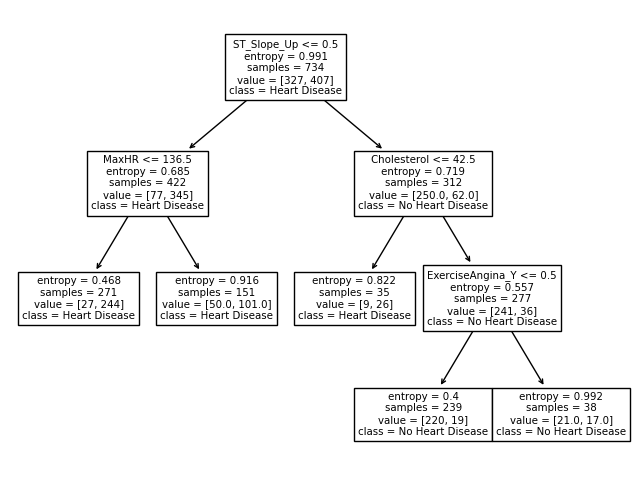

In [8]:
ccp_path = tree.cost_complexity_pruning_path(x_train, y_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)
grid = skm.GridSearchCV(tree,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(x_train, y_train)
opt_tree_depth = grid.best_estimator_.tree_.node_count 
best_ccp_alpha = grid.best_params_['ccp_alpha']

clf_pruned = DTC(criterion='entropy',
          max_depth=opt_tree_depth,
          ccp_alpha=best_ccp_alpha,
          random_state=0)
clf_pruned.fit(x_train, y_train)
ax = subplots(figsize = (8, 6))[1]
plot_tree(clf_pruned, feature_names = feature_names, ax = ax, class_names=['No Heart Disease', 'Heart Disease'])

# feature importance
#importances = clf_pruned.feature_importances_
#importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)
#print('Pruned Tree Fearture Importnace: \n\n', importance_df)

### LDA

In [10]:
Ida_model = LinearDiscriminantAnalysis()
Ida_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

### Logistic Regression

In [12]:
# Logistic Regresiion
scaler = StandardScaler()
x_train_new = scaler.fit_transform(x_train)
x_test_new = scaler.fit_transform(x_test)

log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train_new, y_train)
y_pred_prob = log_reg.predict_proba(x_test_new)[:, 1] 

coefficients = log_reg.coef_[0]
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

print('Coefficient Estimates: \n', coef_df[['Feature', 'Coefficient']])

# P-value
X_train_const = sm.add_constant(x_train_new)
log_reg_sm = sm.Logit(y_train, X_train_const)
result = log_reg_sm.fit()

p_value = result.pvalues
significant_features = p_value[p_value < 0.05]
print('P-Values: \n', significant_features, '\n')
print('Variable Names: \n', 
      "x3: Cholesterol\n", 
      "x4: FastingBS\n", 
      "x5: MAxHR\n", 
      'x6: Oldpeak\n', 
      'x7: Sex_M\n', 
      'x8: ChestPainType_ATA\n',
      'x9: ChestPainType_NAP\n',
      'x10: ChestPainType_TA\n',
      'x13: ExerciseAngina_Y\n',
      'x14: ST_Slope_Flat\n')

Coefficient Estimates: 
               Feature  Coefficient
13      ST_Slope_Flat     0.846085
7   ChestPainType_ATA    -0.750599
8   ChestPainType_NAP    -0.689253
6               Sex_M     0.587188
2         Cholesterol    -0.517569
12   ExerciseAngina_Y     0.457848
5             Oldpeak     0.441877
3           FastingBS     0.421294
9    ChestPainType_TA    -0.356689
14        ST_Slope_Up    -0.313007
10  RestingECG_Normal    -0.140471
1           RestingBP     0.125784
4               MaxHR    -0.123627
0                 Age     0.122581
11      RestingECG_ST    -0.114536
Optimization terminated successfully.
         Current function value: 0.325992
         Iterations 7
P-Values: 
 const    4.352072e-03
x3       6.281879e-05
x4       7.826456e-04
x6       1.371677e-03
x7       2.331275e-06
x8       8.109842e-08
x9       6.268522e-09
x10      5.514484e-04
x13      5.231629e-04
x14      1.291831e-04
dtype: float64 

Variable Names: 
 x3: Cholesterol
 x4: FastingBS
 x5: MAxHR
 x6:

### Ploting ROC AUC curve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


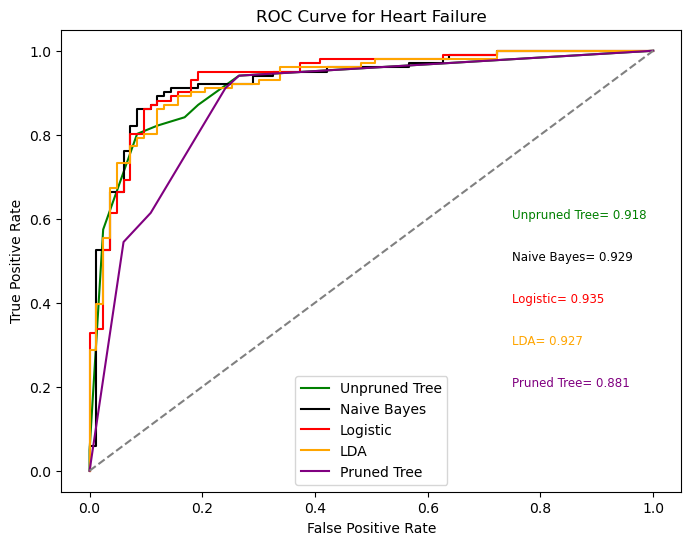

In [14]:
models = {
    'Unpruned Tree': (tree, x_test, 'green'),
    'Naive Bayes': (nb_model, x_test, 'black'),
    'Logistic': (log_reg, x_test_new, 'red'),
    'LDA': (Ida_model, x_test_new, 'orange'),
    'Pruned Tree': (clf_pruned, x_test, 'purple')
}

plt.figure(figsize=(8, 6))
y_pos = 0.6
for name, (model, x, color) in models.items():
    y_pred_prob = model.predict_proba(x)[:,1]
    fpr, tpr, _  = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color = color)
    plt.text(0.75, y_pos, 
             f'{name}= {roc_auc:.3f}', 
             color=color, 
             fontsize=8.5, ha='left')
    y_pos -= 0.1

plt.title('ROC Curve for Heart Failure')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(models.keys(), loc='lower center')
plt.show()

## Yujie's code for Naive Bayes

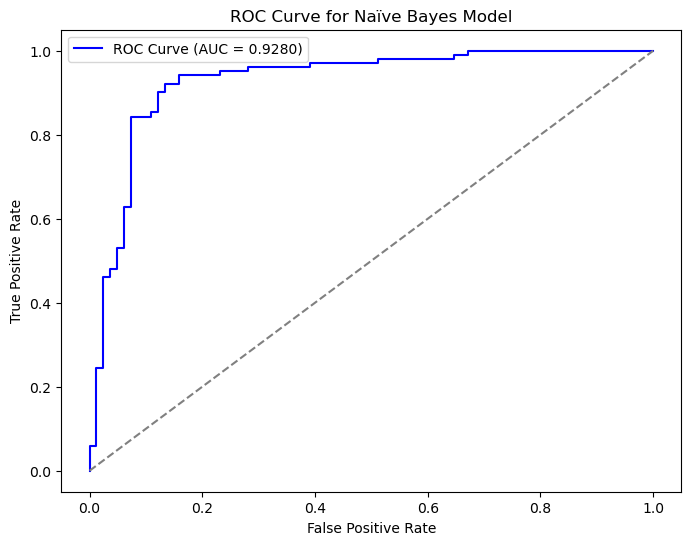

Accuracy: 0.8913
Confusion Matrix:
 [[71 11]
 [ 9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,  auc

data = pd.read_csv('/Users/cream/Downloads/heart.csv')  ## Please update the path to access the data
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 

X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naïve Bayes Model")
plt.legend()
plt.show()

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
